# Understanding the content of the notebook

Home Credit is an international consumer finance provider with operations in multiple European and Asian countries. That focus on lending primarily to people with little or no credit history.Established in 1997 as a non-banking lender in Czech Republic

## Our Prime Objective 
Predict how capable each applicant is of repaying a loan

## Benifits to the company by this analysis
They can carefully cater to those in need and create appropiate services for the appropiate people.

## Preparing the dataset
The dataset to be analyzed application_train.csv will be downloaded from the official page of the dataset from kaggle

In [1]:
#imports
import missingno as msno
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
df=pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
#Checking missing values
df.isnull().sum().head(50)

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

<Axes: >

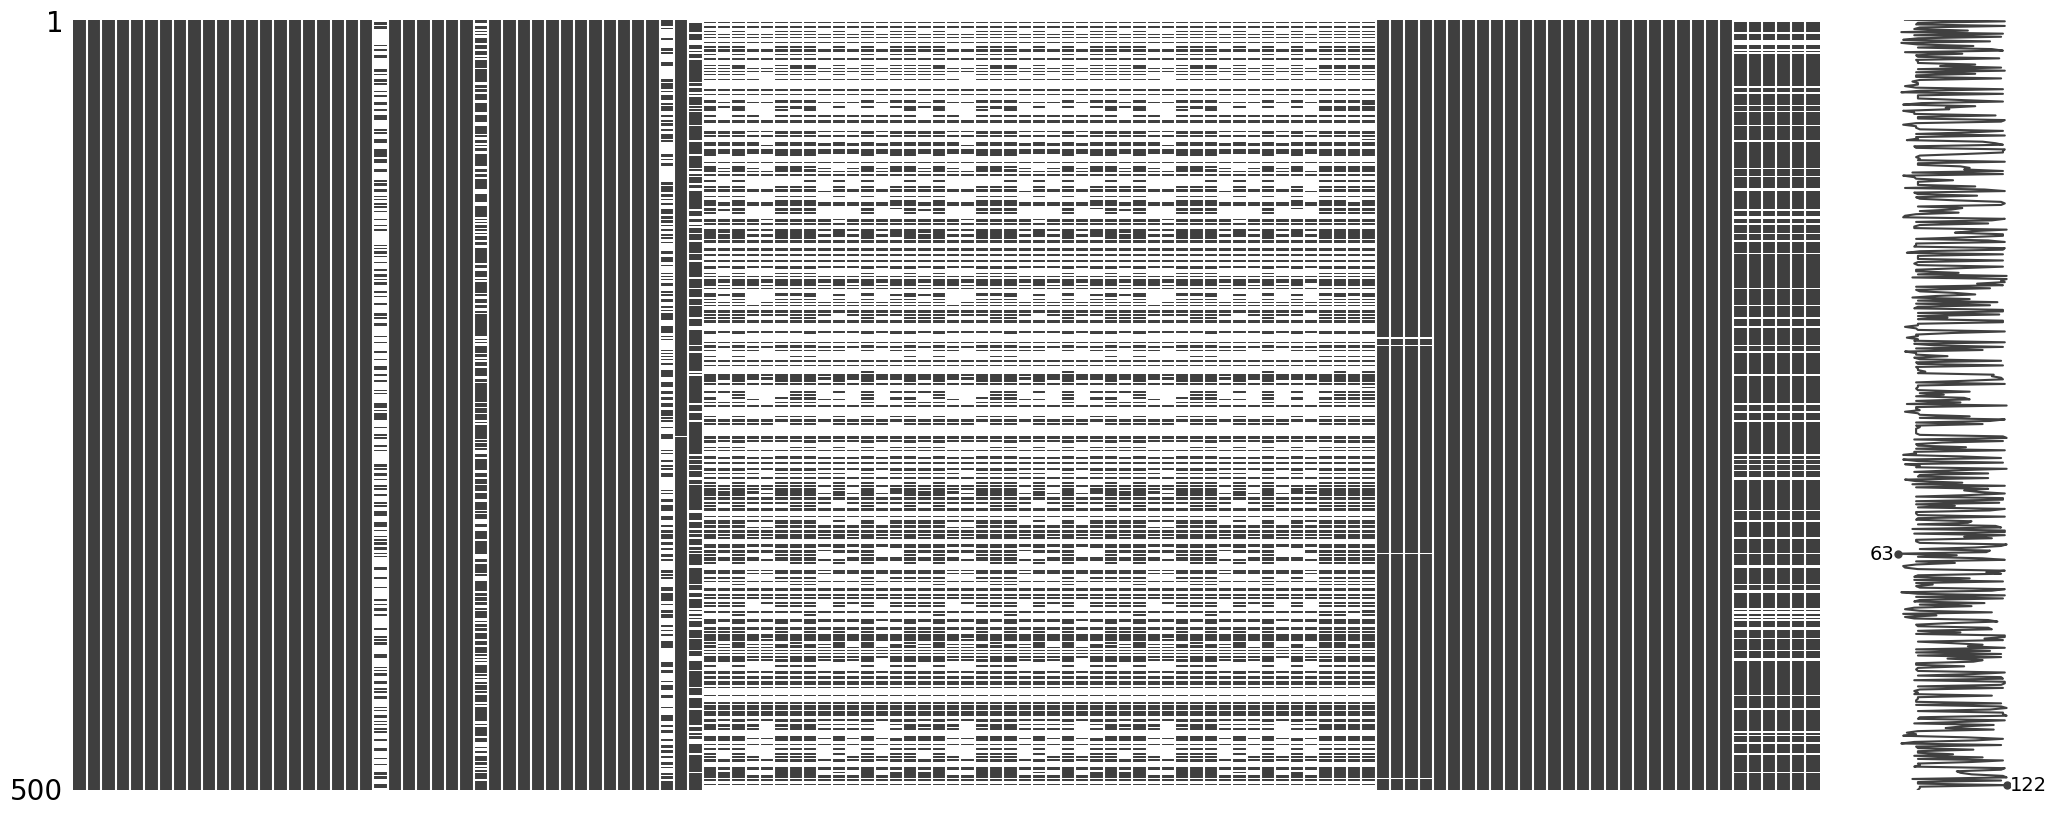

In [6]:
msno.matrix(df.sample(500))

In [7]:
total = df.isnull().sum().sort_values(ascending=False) # Total rows that are null in each collumn
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # Percentage of what's missing and total
missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'missing_ratio'])
missing_df.head(50)

,Total,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


# Setting the problem
Based on the overview of the data, set our own issues and questions.

1. Which metrics increases the probability of a client paying the loan?
2. What type of clients have a probability of taking a loan?

#  Data exploration
We will explore data to solve the problem or question set in the above section. Creating at least five tables and graphs to use in our exploration.

## 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases

1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases
TARGET
0    282686
1     24825
Name: count, dtype: int64


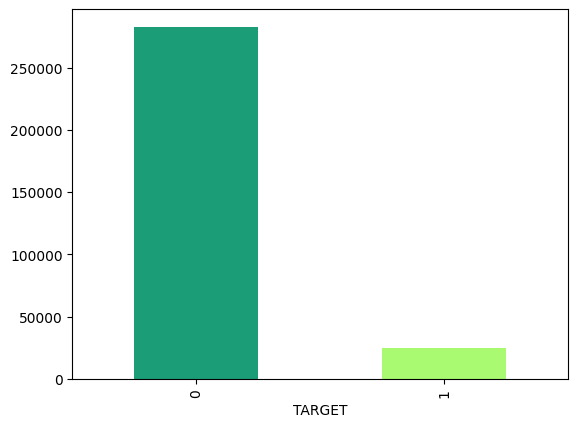

In [8]:
# How many loans have been payed?
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
paid_unpaid = df["TARGET"].value_counts().plot(kind='bar',color = colors)
a1 = df["TARGET"].value_counts()
print("1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases")
print(a1)

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

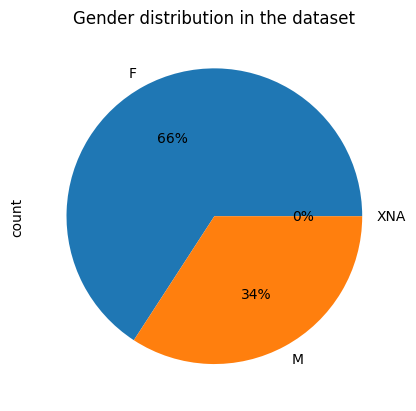

In [9]:
# Gender os dataset
gender_dataset = df["CODE_GENDER"].value_counts().plot(kind='pie',autopct = '%1.0f%%',title='Gender distribution in the dataset')
df["CODE_GENDER"].value_counts()

<Axes: title={'center': 'Gender distribution for clients with paying difficulties'}, ylabel='count'>

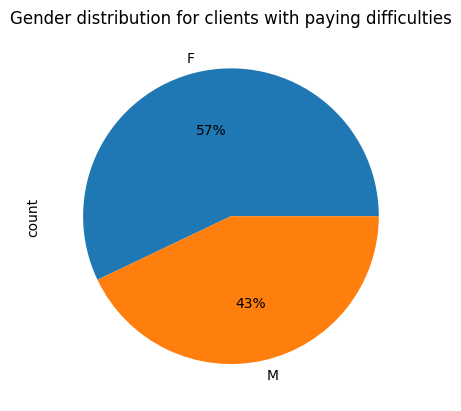

In [10]:
# Gender, those who pay
gender_no_pay = df.loc[df['TARGET']==1,'CODE_GENDER']
gender_no_pay.value_counts().plot(kind='pie',autopct = '%1.0f%%',title='Gender distribution for clients with paying difficulties')

<Axes: title={'center': 'Gender distribution for clients with paying difficulties'}, xlabel='CODE_GENDER'>

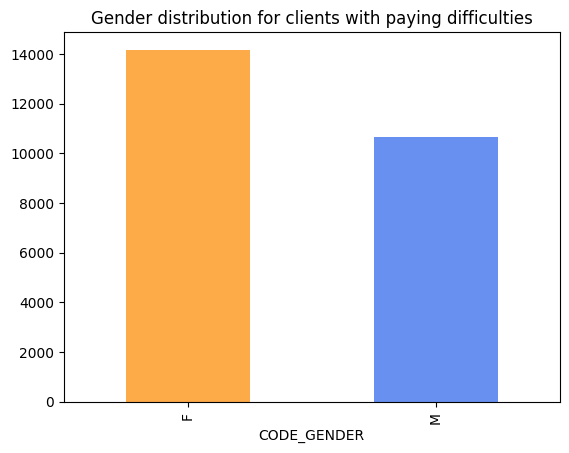

In [11]:
gender_no_pay.value_counts().plot(kind='bar',title='Gender distribution for clients with paying difficulties',color = colors[2:])

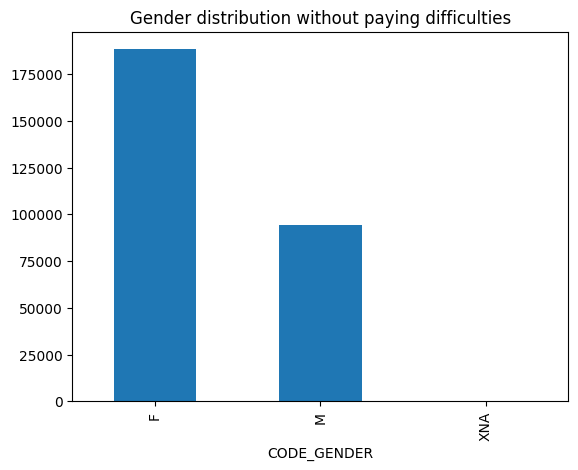

In [12]:
# Gender distribution of clients without payment difficulties
gender_pay = df.loc[df['TARGET'] == 0, 'CODE_GENDER']
gender_pay.value_counts().plot(kind='bar', title='Gender distribution without paying difficulties')
plt.show()


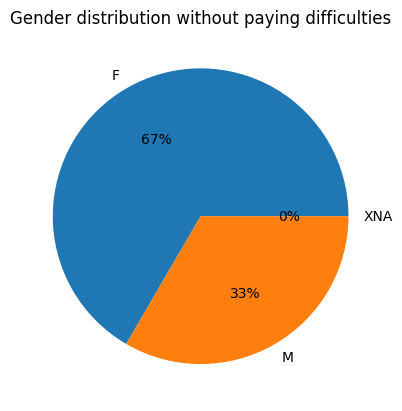

In [13]:
# pie version
gender_pay.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Gender distribution without paying difficulties')
plt.ylabel('')
plt.show()

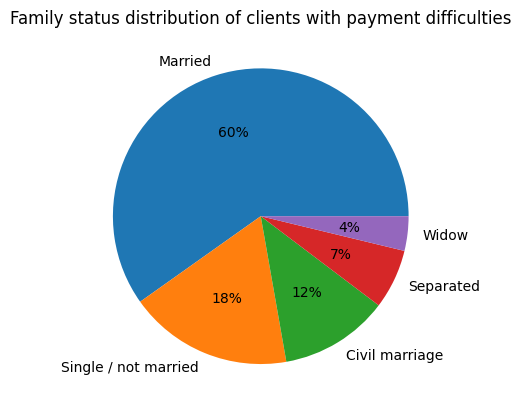

In [14]:
# Family status of clients with payment difficulties/ Those having a family
family_pay = df.loc[df['TARGET'] == 1, 'NAME_FAMILY_STATUS']
family_pay.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Family status distribution of clients with payment difficulties')
plt.ylabel('')
plt.show()

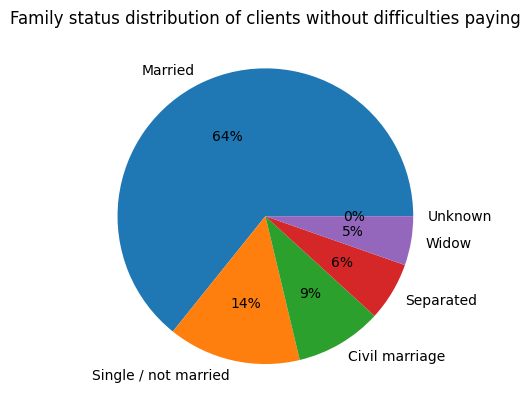

In [15]:
# Those who own a family

family_not_pay = df.loc[df['TARGET'] == 0, 'NAME_FAMILY_STATUS']
family_not_pay.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Family status distribution of clients without difficulties paying')
plt.ylabel('')  # Optional: hides the default y-label
plt.show()

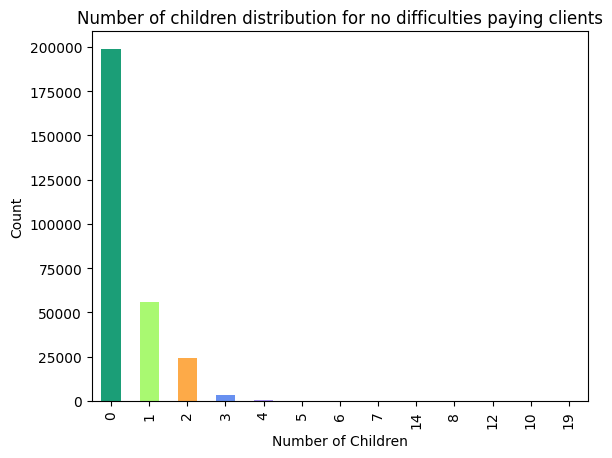

In [16]:
# How many children

family_pay = df.loc[df['TARGET'] == 0, 'CNT_CHILDREN']
family_pay.value_counts().plot(kind='bar', color=colors)
plt.title('Number of children distribution for no difficulties paying clients')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

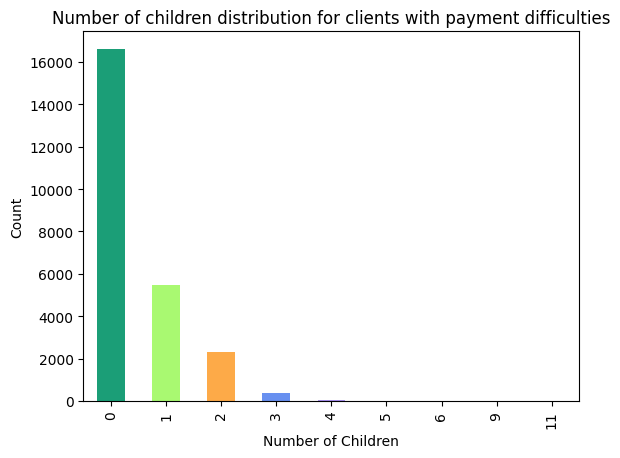

In [17]:
# How many children

family_not_pay = df.loc[df['TARGET'] == 1, 'CNT_CHILDREN']
family_not_pay.value_counts().plot(kind='bar', color=colors)
plt.title('Number of children distribution for clients with payment difficulties')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

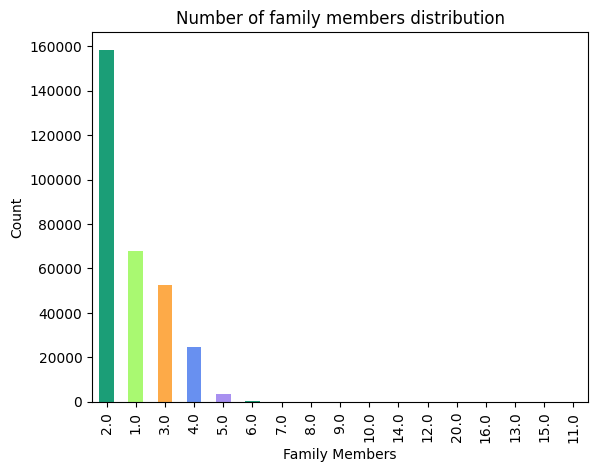

In [18]:
# how many Family members client have
family_members = df['CNT_FAM_MEMBERS'].value_counts().plot(kind='bar', color=colors)
plt.title('Number of family members distribution')
plt.xlabel('Family Members')
plt.ylabel('Count')
plt.show()

<Axes: title={'center': 'Number of family members distribution for with difficulties paying clients'}, xlabel='CNT_FAM_MEMBERS'>

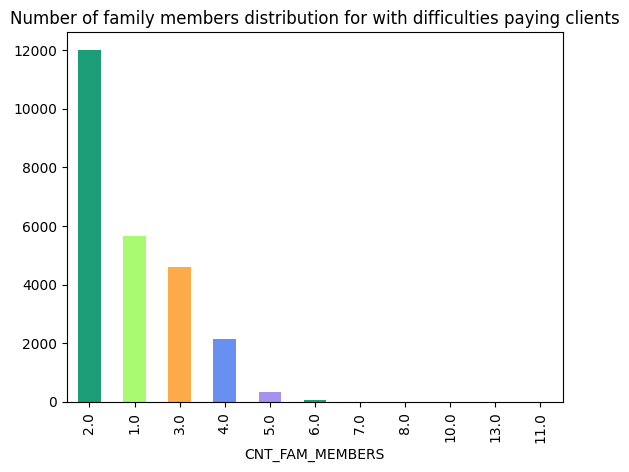

In [19]:
# how many Family members client have
family_no_pay = df.loc[df['TARGET']==1,'CNT_FAM_MEMBERS']
family_no_pay.value_counts().plot(kind='bar',color=colors,title='Number of family members distribution for with difficulties paying clients')

<Axes: title={'center': 'Number of family members distribution for without difficulties paying clients'}, xlabel='CNT_FAM_MEMBERS'>

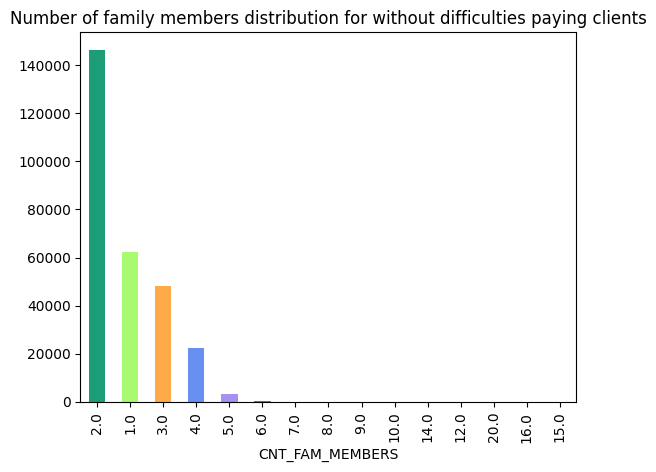

In [20]:
# how many Family members client have

family_pay = df.loc[df['TARGET']==0,'CNT_FAM_MEMBERS']
family_pay.value_counts().plot(kind='bar',color=colors,title='Number of family members distribution for without difficulties paying clients')

In [21]:
def distribution(column, colors, difficulties,title,graph_type='bar'):
    # how many Family members client have
    distribution = df.loc[df['TARGET']==difficulties,column]
    return distribution.value_counts().plot(kind='bar',color=colors,title=title)

<Axes: title={'center': 'bar'}, xlabel='NAME_INCOME_TYPE'>

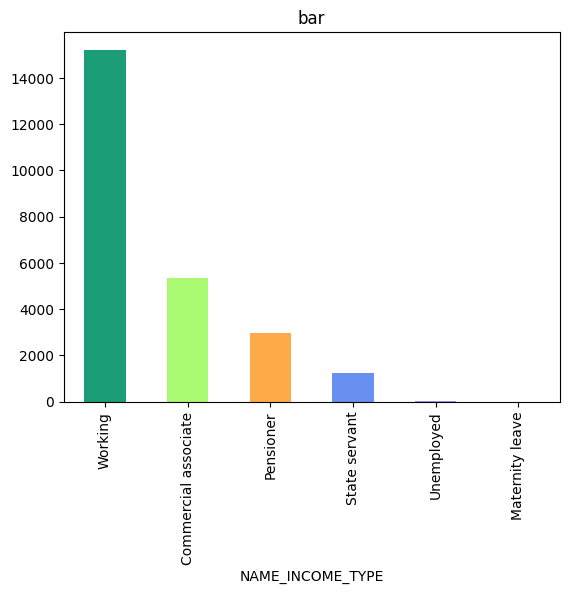

In [22]:
# Income
distribution('NAME_INCOME_TYPE', colors,1, 'bar', 'INCOME TYPE for members with dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_INCOME_TYPE'>

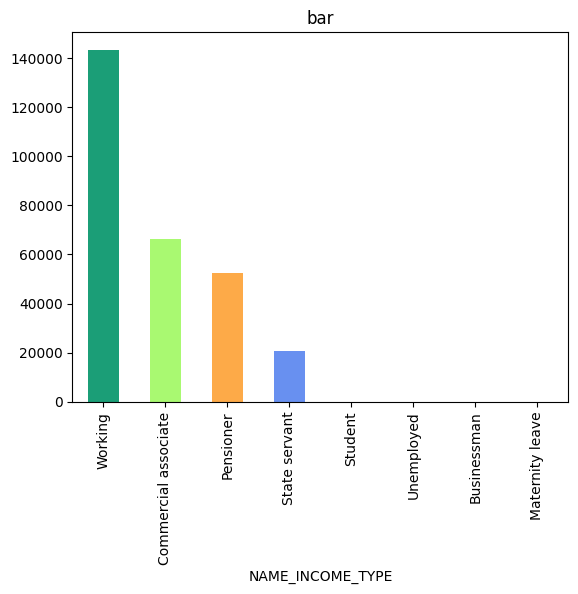

In [23]:
# Income
distribution('NAME_INCOME_TYPE', colors,0, 'bar', 'INCOME TYPE for members without dificulties')


<Axes: title={'center': 'bar'}, xlabel='OCCUPATION_TYPE'>

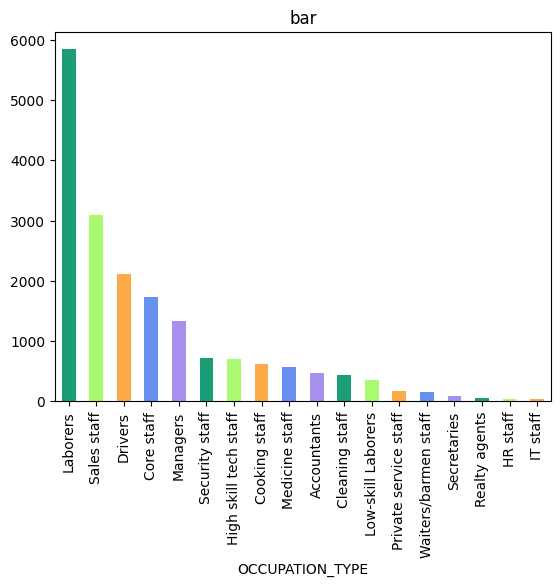

In [24]:
#Occupation type
distribution('OCCUPATION_TYPE', colors,1, 'bar', 'Occupation TYPE for members with dificulties')


<Axes: title={'center': 'bar'}, xlabel='OCCUPATION_TYPE'>

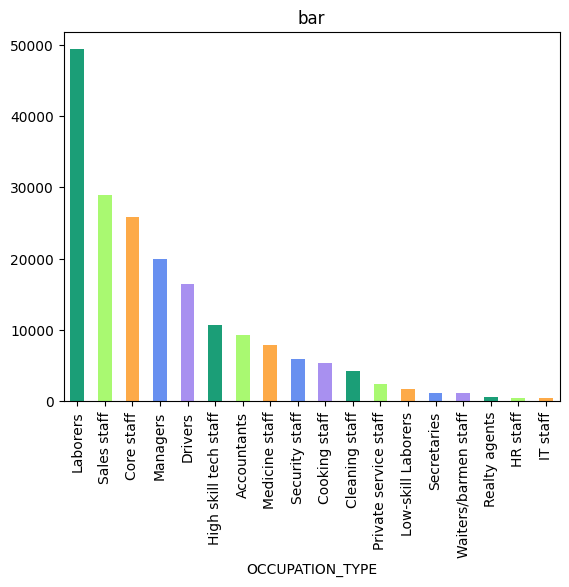

In [25]:
#Occupation type
distribution('OCCUPATION_TYPE', colors,0, 'bar', 'Occupation TYPE for members without dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_EDUCATION_TYPE'>

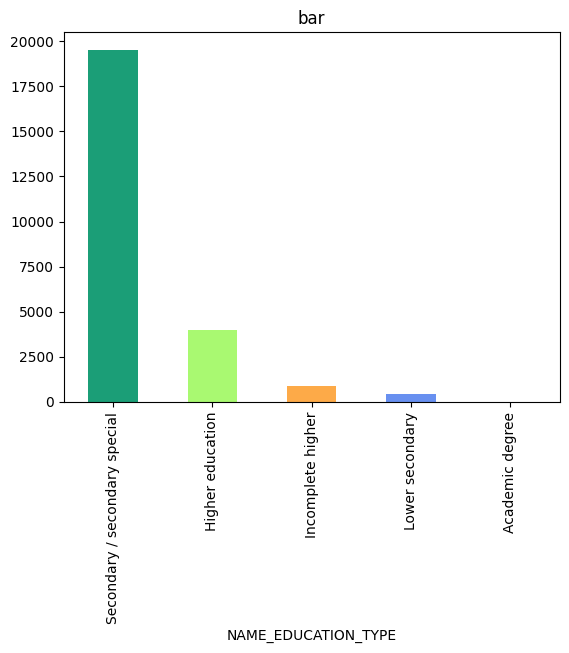

In [26]:

distribution('NAME_EDUCATION_TYPE', colors,1, 'bar', 'Occupation TYPE for members with dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_EDUCATION_TYPE'>

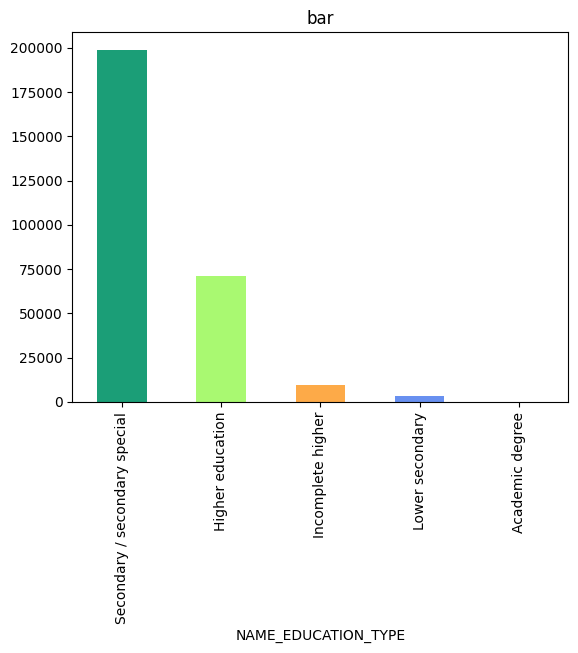

In [27]:

distribution('NAME_EDUCATION_TYPE', colors,0, 'bar', 'Occupation TYPE for members without dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_EDUCATION_TYPE'>

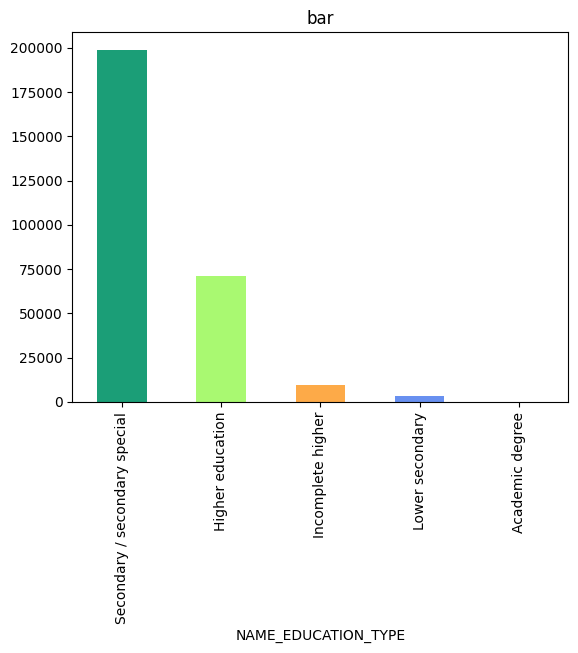

In [28]:
#NAME_HOUSING_TYPE

distribution('NAME_EDUCATION_TYPE', colors,0, 'bar', 'Name housing TYPE for members without dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_EDUCATION_TYPE'>

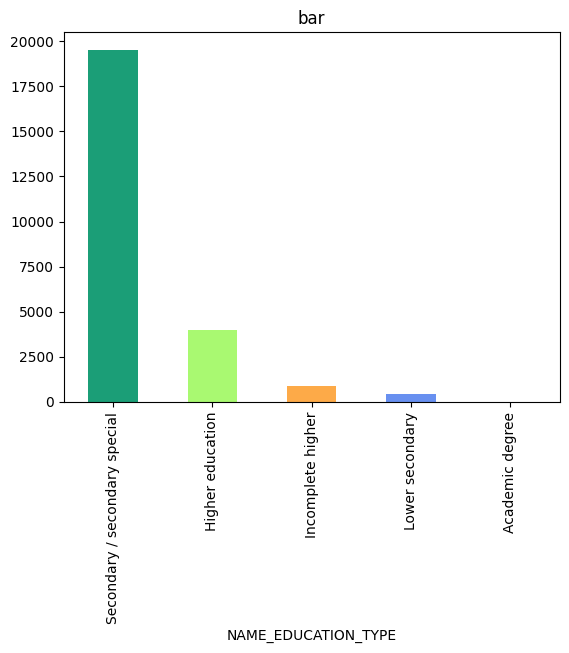

In [29]:

distribution('NAME_EDUCATION_TYPE', colors,1, 'bar', 'Occupation TYPE for members with dificulties')


<Axes: title={'center': 'bar'}, xlabel='NAME_EDUCATION_TYPE'>

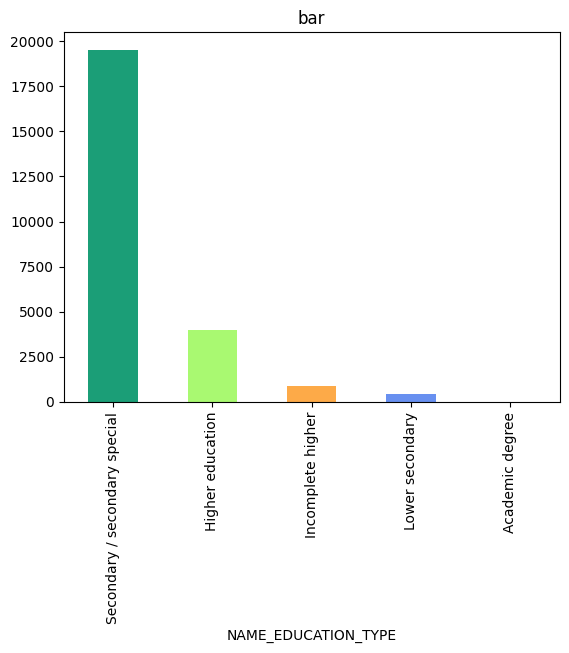

In [30]:

distribution('NAME_EDUCATION_TYPE', colors,1, 'bar', 'Occupation TYPE for members with dificulties')
